# 17. Derivatives Valuation
From Python for Finance

In [1]:
import sys
sys.path.append(".//Valuations//")
from Valuations import *

import datetime as dt

In [2]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2015, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'M')
me_gbm.add_constant('paths', 10000)

In [3]:
csr = constant_short_rate('csr', 0.06)
me_gbm.add_curve('discount_curve', csr)
gbm = geometric_brownian_motion('gbm', me_gbm)

In [4]:
me_call = market_environment('me_call', me_gbm.pricing_date)
me_call.add_constant('strike', 40.)
me_call.add_constant('maturity',dt.datetime(2015,12, 31))
me_call.add_constant('currency','EUR')

In [5]:
payoff_func = 'np.maximum(maturity_value - strike,0)'

In [6]:
from valuation_mcs_european import valuation_mcs_european

In [7]:
eur_call = valuation_mcs_european('eur_call', underlying=gbm, mar_env=me_call, payoff_func=payoff_func)

In [8]:
%time
eur_call.present_value()

Wall time: 0 ns


.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


2.60704

In [9]:
%time eur_call.delta()

Wall time: 11.5 ms


.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


0.57809999999999995

In [10]:
%time eur_call.vega()

Wall time: 23.6 ms


.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


19.053699999999999

In [11]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_call.update(initial_value=s)
    p_list.append(eur_call.present_value(fixed_seed=True))
    d_list.append(eur_call.delta())
    v_list.append(eur_call.vega())

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


Wall time: 350 ms


In [12]:
%matplotlib inline

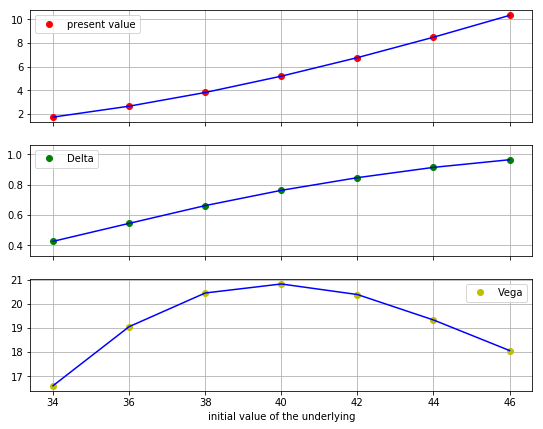

In [13]:
plot_option_stats(s_list, p_list, d_list, v_list)

### Mixture of regular and asian payoff

In [14]:
payoff_func = 'np.maximum(0.33 * (maturity_value + max_value) - 40, 0)'
# payoff dependent on the simulated maturity value and the maximum value

eur_as_call = valuation_mcs_european('eur_as_call', underlying=gbm, mar_env=me_call, payoff_func=payoff_func)

In [15]:
%%time
s_list = np.arange(34., 46.1, 2.)
p_list = []; d_list = []; v_list = []
for s in s_list:
    eur_as_call.update(s)
    p_list.append(eur_as_call.present_value(fixed_seed=True))
    d_list.append(eur_as_call.delta())
    v_list.append(eur_as_call.vega())

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


Wall time: 243 ms


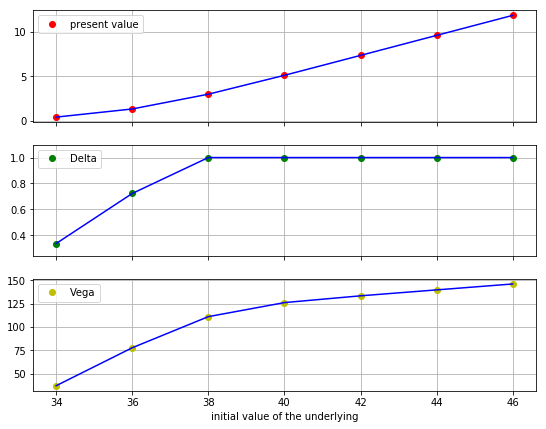

In [16]:
plot_option_stats(s_list, p_list, d_list, v_list)

## American Exercise

In [17]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
me_gbm.add_constant('final_date', dt.datetime(2016, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'W') # weekly frequency
me_gbm.add_constant('paths', 50000)

In [18]:
csr = constant_short_rate('csr', 0.06)
me_gbm.add_curve('discount_curve', csr)
gbm = geometric_brownian_motion('gbm', me_gbm) 

In [19]:
payoff_func = 'np.maximum(strike - instrument_values, 0)'

In [20]:
me_am_put = market_environment('me_am_put', dt.datetime(2015, 1, 1))
me_am_put.add_constant('maturity', dt.datetime(2016, 12, 31))
me_am_put.add_constant('strike', 40.)
me_am_put.add_constant('currency', 'EUR')

In [21]:
am_put = valuation_mcs_american('am_put', underlying=gbm, mar_env=me_am_put, payoff_func=payoff_func)

In [22]:
%time am_put.present_value(fixed_seed=True, bf=5)

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


Wall time: 2.08 s


4.5368110000000001

Replicating some values of the original paper referenced in the text.

In [23]:
maturity=dt.datetime(2015,12,31)
volatility = 0.2
initial_value=36.
am_put.update(initial_value=initial_value,
                         volatility=volatility, 
                         maturity=maturity)

In [24]:
am_put.present_value(bf=5)

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


4.315747

In [25]:
%%time
ls_table = []
for initial_value in (36., 38., 40., 42., 44.):
    for volatility in (0.2, 0.4):
        for maturity in (dt.datetime(2015, 12, 31),
                         dt.datetime(2016, 12, 31)):
            am_put.update(initial_value=initial_value,
                         volatility=volatility, 
                         maturity=maturity)
            ls_table.append([initial_value, 
                             volatility,
                             maturity,
                             am_put.present_value(fixed_seed=True, bf=5)])

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


Wall time: 28.1 s


In [28]:
pd.DataFrame(ls_table, columns=['initial_value', 'volatility','maturity','pv'])

,initial_value,volatility,maturity,pv
0,36.0,0.2,2015-12-31,4.333828
1,36.0,0.2,2016-12-31,4.535917
2,36.0,0.4,2015-12-31,6.248458
3,36.0,0.4,2016-12-31,7.123320
4,38.0,0.2,2015-12-31,3.035230
5,38.0,0.2,2016-12-31,3.366188
6,38.0,0.4,2015-12-31,5.290799
7,38.0,0.4,2016-12-31,6.252597
8,40.0,0.2,2015-12-31,2.089921
9,40.0,0.2,2016-12-31,2.503005


In [29]:
am_put.update(initial_value=36.)
am_put.delta()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


-0.45469999999999999

In [30]:
am_put.vega()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


12.047800000000001